## 1. 프로젝트 (1) Load_digits : 손글씨 분류하기

### (1) 필요한 모듈 불러오기

In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

### (2) 데이터 준비하기

In [38]:
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

digits_data.shape

(1797, 64)

### (3) 데이터 이해하기

In [39]:
digits.target_names # 0-9까지의 숫자 라벨이 지정되어 있음

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

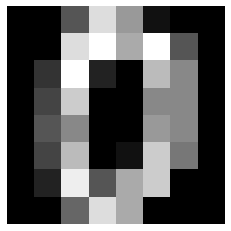

In [41]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

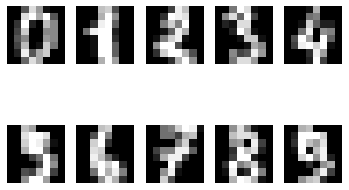

In [42]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    plt.axis('off')
plt.show()

In [43]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

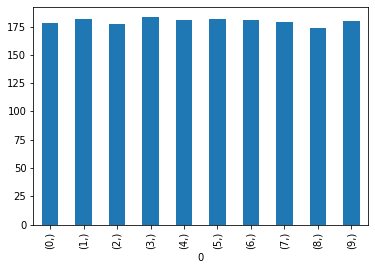

In [73]:
pd.DataFrame(digits.target).value_counts().sort_index().plot(kind="bar"); # 라벨 데이터의 분포 확인

### (4) Train Test 데이터 분리

In [44]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size = 0.2,
                                                   random_state = 7)

### (5) 다양한 모델로 학습시켜보기

#### 5-1. 모델관련 모듈 불러오기

In [159]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

#### 5-1-1. Decision Tree

In [46]:
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.86      0.88      0.87        42
           2       0.82      0.82      0.82        40
           3       0.86      0.91      0.89        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.93      0.93      0.93        28
           7       0.87      0.82      0.84        33
           8       0.85      0.67      0.75        43
           9       0.79      0.81      0.80        32

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



#### 5-1-2. Random Forest

In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       0.94      1.00      0.97        34
           4       0.90      0.97      0.94        37
           5       0.90      1.00      0.95        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       1.00      0.81      0.90        43
           9       0.97      0.94      0.95        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



#### 5-1-3. Soft Vector Machine (SVM)

In [50]:
svm = SVC()

In [51]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### 5-1-4. SGDClassifier

In [52]:
sgd = SGDClassifier()

In [53]:
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.98      0.91        42
           2       1.00      0.95      0.97        40
           3       0.97      0.88      0.92        34
           4       0.97      1.00      0.99        37
           5       0.93      1.00      0.97        28
           6       1.00      0.93      0.96        28
           7       0.97      0.97      0.97        33
           8       0.85      0.91      0.88        43
           9       0.96      0.81      0.88        32

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.95       360
weighted avg       0.95      0.94      0.94       360



#### 5-1-5. Logistic Regression

In [58]:
logistic = LogisticRegression(max_iter = 10000)

In [59]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### 선택한 평가지표 : Acuuracy_score

- 이유 : 데이터의 라벨이 균형을 잘 이루고 있기 때문에 recall, precision, f1-score가 골고루 잘 배분되어 있는 것을 알 수 있었습니다. 이러한 데이터들에 대해선 정확도를 척도로 사용하는 것이 모델 학습에 더욱 유리할 것이라 판단하였습니다.

- 위의 사유에 따라 **정확도가 0.99로 제일 높게 나온 SoftVectorMachine 모델**을 선정하겠습니다.

## 2. Load_wine : 와인을 분류해보자
### (1) 필요한 모듈 불러오기

In [89]:
from sklearn.datasets import load_digits, load_wine
import seaborn as sns

### (2) 데이터 준비하기

In [144]:
wine = load_wine()
wine_label = wine.target
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### (3) 데이터 이해하기

#### 3-1. label 데이터 분포 확인하기

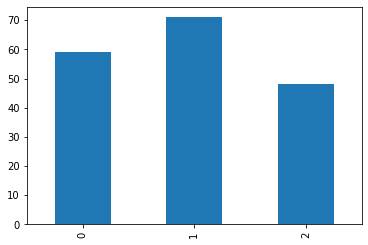

In [145]:
wine_df["label"] = wine_label.astype('object')
wine_df["label"].value_counts().sort_index().plot(kind='bar');

#### 3-2. feature간 상관관계 파악하기

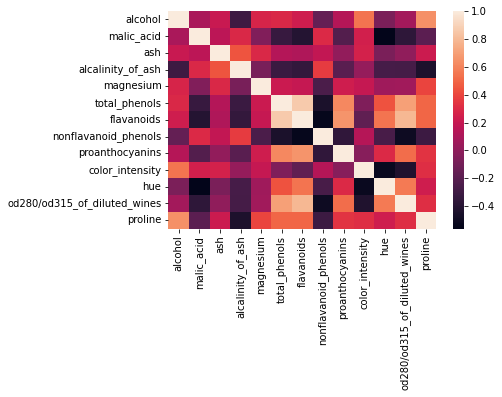

In [146]:
corr= wine_df.corr()
sns.heatmap(corr);

- 대부분의 feature들과 높은 상관관계를 나타내는 feature인 flavanoids, total_phenols를 시각화 합니다

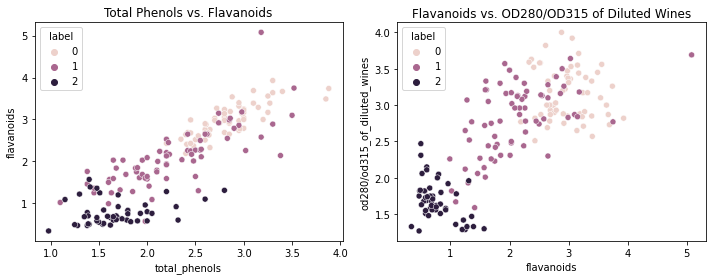

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x="total_phenols", y="flavanoids", hue="label", data=wine_df, ax=axes[0])
axes[0].set_title("Total Phenols vs. Flavanoids")

sns.scatterplot(x="flavanoids", y="od280/od315_of_diluted_wines", hue="label", data=wine_df, ax=axes[1])
axes[1].set_title("Flavanoids vs. OD280/OD315 of Diluted Wines")

plt.tight_layout()
plt.show()

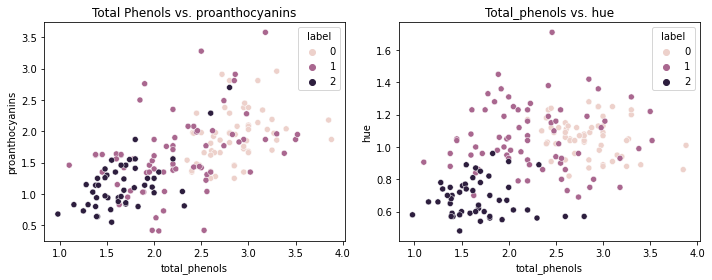

In [148]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x="total_phenols", y="proanthocyanins", hue="label", data=wine_df, ax=axes[0])
axes[0].set_title("Total Phenols vs. proanthocyanins")

sns.scatterplot(x="total_phenols", y="hue", hue="label", data=wine_df, ax=axes[1])
axes[1].set_title("Total_phenols vs. hue")

plt.tight_layout()
plt.show()

#### 3-2-1. 데이터 전처리

In [150]:
processed_df = wine_df.copy()

processed_df.drop(["total_phenols"], axis=1, inplace=True)

- flavanoid를  함께 제거하니 정확도가 많이 떨어졌습니다. 0.93 -> 0.89 | 따라서 total_phenols만 제거합니다.

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

X_pro = processed_df.drop("label", axis=1)
y_pro = processed_df["label"].astype("int")

X_pro = scaler.fit_transform(X_pro, y_pro)

### (4) Train, Test 데이터 분리하기

In [131]:
X = wine_df.drop("label", axis=1)
y = wine_df["label"].astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [141]:
X_train_pro, X_test_pro, y_train_pro, y_test_pro = train_test_split(X, y, test_size=0.2, random_state=7)

### (5) 다양한 모델로 학습시켜보기

#### 5-1-1. Decision Tree

- DecisionTree 모델을 바탕으로 전처리 전 후를 비교하였습니다.
- 정확도 기준 0.92 -> 0.94 로 성능 향상을 얻을 수 있었습니다.

In [127]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.94      0.94      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.91        36
weighted avg       0.93      0.92      0.92        36



In [157]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_pro, y_train_pro) # 전처리 후 데이터를 바탕으로 학습 진행
y_pred = dt2.predict(X_test_pro)
print(classification_report(y_test_pro, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.94      1.00      0.97        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



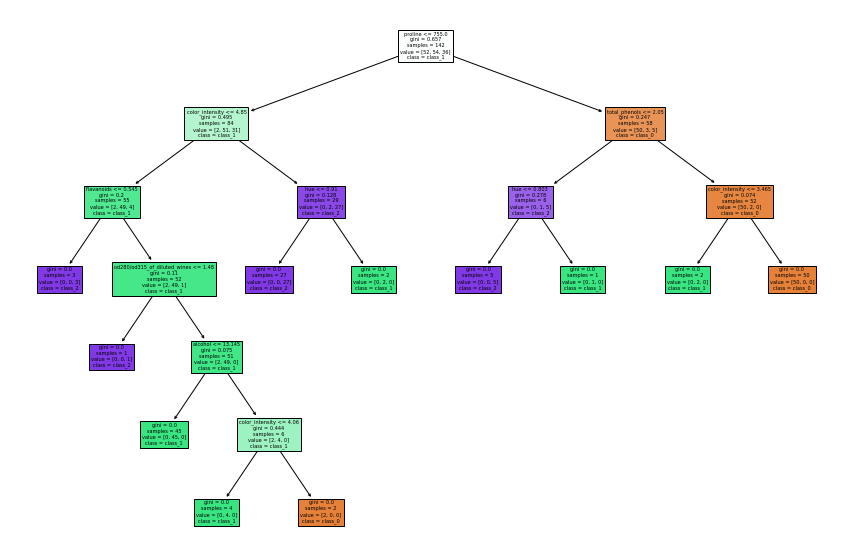

In [161]:
plt.figure(figsize=(15, 10))
plot_tree(dt2, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

#### 5-1-2. Random Forest

In [155]:
rf = RandomForestClassifier()
rf.fit(X_train_pro, y_train_pro)
y_pred = rf.predict(X_test_pro)
print(classification_report(y_test_pro, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 5-1-3. SuportVectorMachine (SVM)

In [156]:
svm = SVC()
svm.fit(X_train_pro, y_train_pro)
y_pred = svm.predict(X_test_pro)
print(classification_report(y_test_pro, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### 5-1-4. SGD Classifier

In [162]:
sgd = SGDClassifier()
sgd.fit(X_train_pro, y_train_pro)
y_pred = sgd.predict(X_test_pro)
print(classification_report(y_test_pro, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.24      0.38        17
           2       0.42      0.67      0.52        12

    accuracy                           0.53        36
   macro avg       0.65      0.63      0.53        36
weighted avg       0.72      0.53      0.49        36



#### 5-1-5. Logistic Regression

In [164]:
logistic = LogisticRegression(max_iter = 10000)
logistic.fit(X_train_pro, y_train_pro)
y_pred = logistic.predict(X_test_pro)
print(classification_report(y_test_pro, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



### 선택한 평가지표 : f1_score
- 데이터 라벨의 불균형이 어느정도 있기 때문에, f1-score를 채택하였습니다. 더불어 recall의 score를 사용해도 되지만, recall의 경우 음성을 양성으로 거짓 분류하는 False Positive Score에 무게를 둔다는 점에서 wine 데이터 셋과 잘 맞지 않을 것이라 판단하여 recall과 precision의 조화평균으로 계산하는 score인 f1-score를 사용합니다.

- 위의 평가지표를 기준으로 **가장 높은 점수인 1.00을 보인 RandomForestClassifier**를 채택하였습니다. 

## 3. Load_Breast_Cancer : 유방암 여부 진단하기

### (1) 필요한 모듈 import하기

In [165]:
from sklearn.datasets import load_breast_cancer

### (2) 데이터 준비하기

In [200]:
cancer = load_breast_cancer()
cancer_label = cancer.target
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### (3) 데이터 이해하기

1    357
0    212
dtype: int64


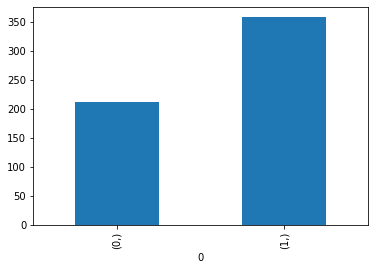

In [172]:
print(pd.DataFrame(cancer_label).value_counts())

pd.DataFrame(cancer_label).value_counts().sort_index().plot(kind="bar");

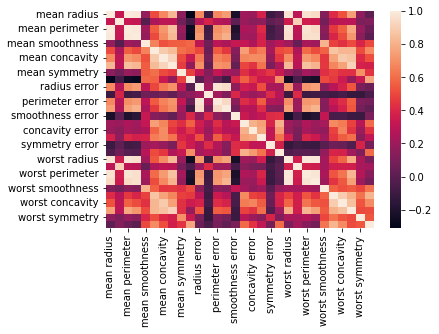

In [167]:
corr= cancer_df.corr()
sns.heatmap(corr);

- 데이터 자체 불균형이 존재합니다. 
- 이는 후에 평가지표를 결정할 때, 중요 요인으로 작용할 것입니다.
- 상관관계도 여러 변수들 사이에 높은 것을 알 수 있습니다. 후에 전처리를 한 번에 진행하겠습니다.

### (4) Train, Test 데이터 분리하기

In [173]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df, cancer_label, test_size = 0.2, random_state = 7)

### (5) 다양한 모델로 학습시켜보기

#### 5-1-1. Decision Tree

In [174]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.92      0.96      0.94        74

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



#### 5-1-2. RandomForest

In [175]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



#### 5-1-3. Support Vector Machine

In [176]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



#### 5-1-4. SGDClassifier

In [177]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82        40
           1       0.87      0.97      0.92        74

    accuracy                           0.89       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.89      0.88       114



#### 5-1-5. Logistic Regression

In [179]:
logisitic = LogisticRegression(max_iter = 10000)
logisitic.fit(X_train, y_train)
y_pred = logisitic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### (6) 데이터 전처리 후 모델 학습 진행
- 각 컬럼을 읽어보니, 각 수치 별 mean, error, worst 값으로 이루어져 있습니다. 이 컬럼을 이용해서 차원을 줄여보겠습니다.
- 상관관계를 파악하여 다중공산성 여부를 파악합니다.

In [181]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [182]:
cancer_df[["mean radius", "radius error", "worst radius"]]

,mean radius,radius error,worst radius
0,17.99,1.0950,25.380
1,20.57,0.5435,24.990
2,19.69,0.7456,23.570
3,11.42,0.4956,14.910
4,20.29,0.7572,22.540
...,...,...,...
564,21.56,1.1760,25.450
565,20.13,0.7655,23.690
566,16.60,0.4564,18.980
567,20.60,0.7260,25.740


In [201]:
for feature in cancer.feature_names:
    target = feature.split()[-1]
    
    if target == "error":
        target = feature.split()[0]
    
    if target == "dimension" or target == "fractal":
        target = "fractal dimension"
    elif target == "points" or target == "concave":
        target = "concave points"
    
    cancer_df[f"{target} score"] = (cancer_df[f'worst {target}'] - cancer_df[f'mean {target}']) / cancer_df[f'{target} error']

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,radius score,texture score,perimeter score,area score,smoothness score,compactness score,concavity score,concave points score,symmetry score,fractal dimension score
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,6.748858,7.677013,7.195250,6.636245,6.844820,7.911909,7.664247,7.454316,7.266067,6.489585
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,8.132475,7.684971,7.622131,8.504320,7.475598,8.253823,8.317204,8.644030,6.753060,9.159117
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,5.203863,5.439065,4.907306,5.381261,5.658537,6.605092,6.602296,5.592809,6.862222,6.035878
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,7.041969,5.294118,6.179971,6.669115,7.387486,7.809064,7.869634,8.157472,6.776790,8.205908
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,2.971474,2.982209,3.144538,2.943668,3.228895,2.933767,3.551336,3.087533,3.160592,3.509286


In [202]:
score_columns = [col for col in cancer_df.columns if 'score' in col]
cancer_df = cancer_df[score_columns]

cancer_df.head()

,radius score,texture score,perimeter score,area score,smoothness score,compactness score,concavity score,concave points score,symmetry score,fractal dimension score
0,6.748858,7.677013,7.195250,6.636245,6.844820,7.911909,7.664247,7.454316,7.266067,6.489585
1,8.132475,7.684971,7.622131,8.504320,7.475598,8.253823,8.317204,8.644030,6.753060,9.159117
2,5.203863,5.439065,4.907306,5.381261,5.658537,6.605092,6.602296,5.592809,6.862222,6.035878
3,7.041969,5.294118,6.179971,6.669115,7.387486,7.809064,7.869634,8.157472,6.776790,8.205908
4,2.971474,2.982209,3.144538,2.943668,3.228895,2.933767,3.551336,3.087533,3.160592,3.509286


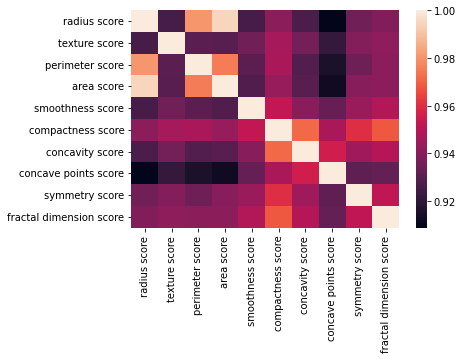

In [203]:
corr= cancer_df.corr()
sns.heatmap(corr);

- 상관관계를 보아, 따로 제거하지 않아도 될 것으로 판단하여 진행합니다.

#### 6-1. 모델 학습 진행

- 전처리 전에 가장 높은 recall score를 보여준 Random Forest를 활용하여 비교하도록 하겠습니다.

In [206]:
cancer_df.isna().sum()

radius score                0
texture score               0
perimeter score             0
area score                  0
smoothness score            0
compactness score           0
concavity score            13
concave points score       13
symmetry score              0
fractal dimension score     0
dtype: int64

In [207]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.fillna(0), cancer_label, test_size = 0.2, random_state = 7)

In [208]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.47      0.58        40
           1       0.76      0.91      0.83        74

    accuracy                           0.75       114
   macro avg       0.75      0.69      0.70       114
weighted avg       0.75      0.75      0.74       114



- 모델의 성능이 더욱 많이 떨어진 모습을 볼 수 있었습니다. 이는 모델의 복잡도가 너무 단순해서 발생한 것이라고 판단하였습니다.
- 따라서 추가한 피처와 기존 피처를 함께 추가한 상태로 학습 및 평가를 진행하였습니다.

In [211]:
cancer = load_breast_cancer()
cancer_label = cancer.target
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [212]:
for feature in cancer.feature_names:
    target = feature.split()[-1]
    
    if target == "error":
        target = feature.split()[0]
    
    if target == "dimension" or target == "fractal":
        target = "fractal dimension"
    elif target == "points" or target == "concave":
        target = "concave points"
    
    cancer_df[f"{target} score"] = (cancer_df[f'worst {target}'] - cancer_df[f'mean {target}']) / cancer_df[f'{target} error']

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,radius score,texture score,perimeter score,area score,smoothness score,compactness score,concavity score,concave points score,symmetry score,fractal dimension score
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,6.748858,7.677013,7.195250,6.636245,6.844820,7.911909,7.664247,7.454316,7.266067,6.489585
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,8.132475,7.684971,7.622131,8.504320,7.475598,8.253823,8.317204,8.644030,6.753060,9.159117
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,5.203863,5.439065,4.907306,5.381261,5.658537,6.605092,6.602296,5.592809,6.862222,6.035878
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,7.041969,5.294118,6.179971,6.669115,7.387486,7.809064,7.869634,8.157472,6.776790,8.205908
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,2.971474,2.982209,3.144538,2.943668,3.228895,2.933767,3.551336,3.087533,3.160592,3.509286


In [214]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.fillna(0), cancer_label, test_size = 0.2, random_state = 7)

In [215]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
    macro avg      0.97      0.95      0.96       114
    weighted avg   0.97      0.96      0.96       114


- 기존 모델보다 0.01 정도지만, 모델의 성능 향상을 얻을 수 있었습니다.

### 선택된 평가지표 : recall_score
- 위 유방암 데이터는 불균형성이 높은 데이터셋이기 때문에, 이를 고려할 수 있는 평가지표가 필요했습니다. 따라서 recall_score를 활용하여 점수를 비교 및 판단하는 것이 좋다고 생각했습니다. 추가적으로 유방암의 경우, False Positive  보다 False Negative를 잘 골라내야 유방암 환자들에게 더욱 잘 대처할 수 있을 것이라는 점을 고려하여 선택하게 되었습니다.

- 모델은 **가능 높은 recall score를 보여준 Random Forest**를 채택하였습니다.